In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Degree 1 mse = 0.437
Degree 1 mae = 0.533
Degree 3 mse = 0.235
Degree 3 mae = 0.414
Degree 10 mse = 0.218
Degree 10 mae = 0.38


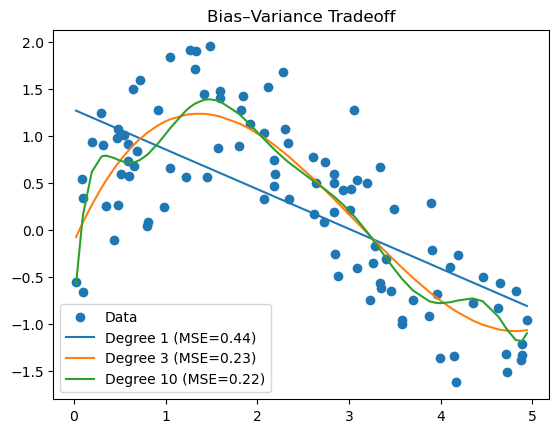

In [27]:
# Synthetic dataset
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X) + 0.5 * np.random.randn(100, 1)

# Models of varying complexity
degrees = [1, 3, 10]

plt.figure()
plt.scatter(X, y, label="Data")

for deg in degrees:
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    print('Degree '+str(deg)+' mse =', round(mse,3))
    print('Degree '+str(deg)+' mae =', round(mae,3))
    
    plt.plot(X, y_pred, label=f"Degree {deg} (MSE={mse:.2f})")

plt.legend()
plt.title("Bias–Variance Tradeoff")
plt.show()



**Seems like model with degree 10 is the best with both lowest mse and mae, but visually this model appears to wiggly and trace some noise behavior so possible overfitting**

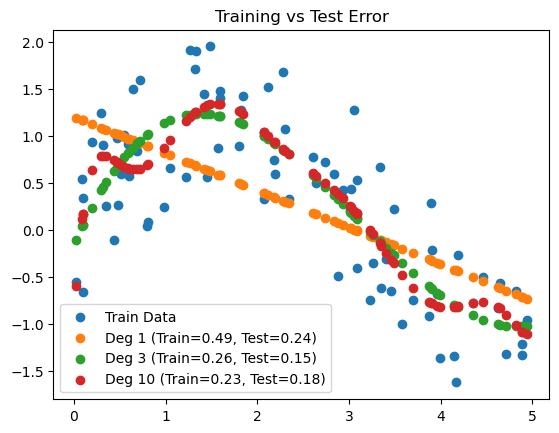

In [36]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.figure()
plt.scatter(X_train, y_train, label="Train Data")

for deg in degrees:
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    plt.scatter(X_train, y_train_pred,
             label=f"Deg {deg} (Train={train_mse:.2f}, Test={test_mse:.2f})")

plt.legend()
plt.title("Training vs Test Error")
plt.show()


**Now it makes more sense, test error is higher than training error as model complexity has increased**

# Loss Functions & Bias–Variance Tradeoff

## Objective
This notebook explores:

- Loss functions (MSE)
- Model complexity
- Underfitting vs overfitting
- Bias–variance tradeoff

Using polynomial regression models of varying degrees.

---

## Dataset
Synthetic nonlinear dataset:

\[
y = \sin(X) + \text{Gaussian noise}
\]

Noise ensures realistic fitting challenges.

---

## Models Evaluated
Polynomial regression with degrees:

- 1 (linear)
- 3
- 10

---

## Evaluation Metric
**Mean Squared Error (MSE)**

Measures average squared prediction error.

---

## Results & Interpretation

### Degree 1
- Too simple
- Cannot capture nonlinear structure

**Conclusion:** Underfitting (high bias)

---

### Degree 3
- Captures general trend
- Smooth fit

**Conclusion:** Good generalization

---

### Degree 10
- Highly flexible
- Fits noise fluctuations

**Conclusion:** Overfitting (high variance)

---

## Key Insight – Bias–Variance Tradeoff
Increasing complexity:

- Reduces bias
- Increases variance

Optimal models balance both.

---

## Conclusion
Lowest training error does not guarantee best generalization.
